## 1. Read the column description and ensure you understand each attribute well

In [2]:
# Numerical libraries
import numpy as np   

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

#importing from sklearn to split data
from sklearn.model_selection import train_test_split

#importing LogisticRegression from sklearn
from sklearn.linear_model import LogisticRegression

#To calculate accuracy measures and confusion matrix
from sklearn import metrics

#To use the Label Encoder function
from sklearn import preprocessing
from sklearn import model_selection

#Importing Naive Bayes Classifier fron sklearn
from sklearn.naive_bayes import GaussianNB

#Importing KNearest Neighbours Classifier from sklearn
from sklearn.neighbors import KNeighborsClassifier

from scipy.stats import zscore

In [3]:
df=pd.read_csv("Bank_Personal_Loan_Modelling-1.csv",index_col='ID')
df.isna().sum()
df.shape

(5000, 13)

In [4]:
df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,,,
1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [35]:
#Taking the absolute values in place of the negative values.
df['Experience'] = df['Experience'].abs()

In [36]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.119600,11.440484,0.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0


#### Salary and CCAvg are the driving attributes.

In [37]:
df.var()

Age                     131.404166
Experience              130.884673
Income                 2119.104235
Family                    1.317130
CCAvg                     3.054312
Education                 0.705380
Mortgage              10345.697538
Personal Loan             0.086801
Securities Account        0.093519
CD Account                0.056763
Online                    0.240678
CreditCard                0.207606
dtype: float64

In [38]:
df=df.drop(['ZIP Code'],axis=1)

KeyError: "['ZIP Code'] not found in axis"

In [ ]:
df.shape

In [39]:
pldf=df.drop(['Personal Loan'],axis=1)   ##To make the Target Y

In [40]:
pldf.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,
1,25,1,49,4,1.6,1,0,1,0,0,0
2,45,19,34,3,1.5,1,0,1,0,0,0
3,39,15,11,1,1.0,1,0,0,0,0,0
4,35,9,100,1,2.7,2,0,0,0,0,0
5,35,8,45,4,1.0,2,0,0,0,0,1


In [41]:
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,,
1,25,1,49,4,1.6,1,0,0,1,0,0,0
2,45,19,34,3,1.5,1,0,0,1,0,0,0
3,39,15,11,1,1.0,1,0,0,0,0,0,0
4,35,9,100,1,2.7,2,0,0,0,0,0,0
5,35,8,45,4,1.0,2,0,0,0,0,0,1


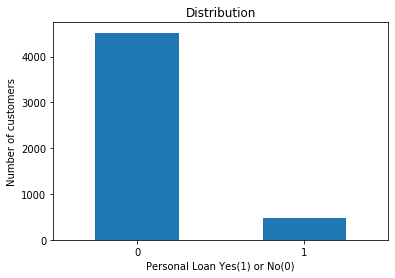

In [42]:
df['Personal Loan'].value_counts().plot.bar()
plt.xticks(rotation=360)
plt.xlabel("Personal Loan Yes(1) or No(0)")
plt.ylabel("Number of customers")
plt.title("Distribution")
plt.show()

In [43]:
df.groupby(['Personal Loan']).count()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,
0,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480,480


# Split the data into training and test set in the ratio of 70:30 respectively

In [44]:
array=df.values
arraypl=pldf.values

X=arraypl
Y=array[:,7]

In [45]:
test_size = 0.30
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=seed)
type(X_train)
X

array([[25.,  1., 49., ...,  0.,  0.,  0.],
       [45., 19., 34., ...,  0.,  0.,  0.],
       [39., 15., 11., ...,  0.,  0.,  0.],
       ...,
       [63., 39., 24., ...,  0.,  0.,  0.],
       [65., 40., 49., ...,  0.,  1.,  0.],
       [28.,  4., 83., ...,  0.,  1.,  1.]])

In [46]:
# Fit the model on 30%
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test,y_predict))

0.9533333333333334
[[1342   20]
 [  50   88]]
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97      1362
         1.0       0.81      0.64      0.72       138

    accuracy                           0.95      1500
   macro avg       0.89      0.81      0.85      1500
weighted avg       0.95      0.95      0.95      1500



C:\Users\Chris\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### The accuracy of the Logistic Regression Model is : 0.95

## Naiev Bayes Classifier

In [18]:
print("Accuracy is : ",model_score)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(X_test, y_test)))
print("F1 Score is : ",metrics.f1_score(y_predict,y_test))

Accuracy is :  0.9533333333333334
Accuracy of logistic regression classifier on test set: 0.95
F1 Score is :  0.7154471544715448


In [47]:
seed = 7  # Random numbmer seeding for reapeatability of the code

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=test_size, random_state=seed)

In [48]:
# Invoking the NB Gaussian function to create the model
# fitting the model in the training data set
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [49]:
# make predictions
expected = y_test
predicted = model.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

         0.0       0.96      0.91      0.93      1362
         1.0       0.40      0.59      0.48       138

    accuracy                           0.88      1500
   macro avg       0.68      0.75      0.70      1500
weighted avg       0.91      0.88      0.89      1500

[[1237  125]
 [  56   82]]


#### The accuracy of the Naive Bayes model is 88%

## KNN

In [22]:
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )

In [23]:
df_feature=df.drop(labels="Personal Loan",axis=1)
df_feature.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,
1,25,1,49,4,1.6,1,0,1,0,0,0
2,45,19,34,3,1.5,1,0,1,0,0,0
3,39,15,11,1,1.0,1,0,0,0,0,0
4,35,9,100,1,2.7,2,0,0,0,0,0
5,35,8,45,4,1.0,2,0,0,0,0,1


In [24]:
df_feature.dtypes

Age                     int64
Experience              int64
Income                  int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [25]:
df_feature_z = df_feature.apply(zscore)  # convert all attributes to Z scale 
df_feature_z.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,2.478018e-17,1.0001,-1.948906,-0.901970,-0.029524,0.842923,1.889859
Experience,5000.0,5.595524e-17,1.0001,-1.758808,-0.884631,-0.010455,0.863721,2.000150
Income,5000.0,1.939449e-16,1.0001,-1.428969,-0.755483,-0.212348,0.526315,3.263712
Family,5000.0,7.850609e-16,1.0001,-1.216855,-1.216855,-0.345432,0.525991,1.397414
CCAvg,5000.0,-2.078338e-17,1.0001,-1.108987,-0.708412,-0.250611,0.321641,4.613525
Education,5000.0,-6.315837e-16,1.0001,-1.049078,-1.049078,0.141703,1.332484,1.332484
Mortgage,5000.0,2.810197e-16,1.0001,-0.555524,-0.555524,-0.555524,0.437558,5.688108
Securities Account,5000.0,5.092149e-16,1.0001,-0.341423,-0.341423,-0.341423,-0.341423,2.928915
CD Account,5000.0,4.426903e-16,1.0001,-0.253540,-0.253540,-0.253540,-0.253540,3.944146
Online,5000.0,2.986500e-16,1.0001,-1.216618,-1.216618,0.821951,0.821951,0.821951


In [26]:
df_labels=df['Personal Loan']

In [27]:
# store the normalized features data into np array 

X = np.array(df_feature_z)
X.shape

(5000, 11)

In [28]:
# store the bc_labels data into a separate np array

y = np.array(df_labels)
y.shape

(5000,)

In [29]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [30]:
# Call Nearest Neighbour algorithm

NNH.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [31]:
# For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will 
# be assigned to the test data point

predicted_labels = NNH.predict(X_test)
NNH.score(X_test, y_test)

0.954

### The accuracy of the K-NN Model is : 0.954

In [32]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics

print(metrics.confusion_matrix(y_test, predicted_labels))

[[1344    7]
 [  62   87]]


#### K-NN model has an accuracy of 95.4% which is higher than the Logistic Regression model's 95%. Hence, K-NN model is best suited as it performs better